# Load dataset (Fashion MNIST)

In [14]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd

In [3]:
labels={
    0:'T-shirt/top',
    1:'Trouser',
    2:'Pullover',
    3:'Dress',
    4:'Coat',
    5:'Sandal',
    6:'Shirt',
    7:'Sneaker',
    8:'Bag',
    9:'Ankle boot',
}
def load_mnist(path, kind='train'):
    import os
    import struct
    import gzip
    import numpy as np

    """Load MNIST data from `path`"""
    labels_path = os.path.join(path,
                               '%s-labels-idx1-ubyte.gz'
                               % kind)
    images_path = os.path.join(path,
                               '%s-images-idx3-ubyte.gz'
                               % kind)

    with gzip.open(labels_path, 'rb') as lbpath:
        struct.unpack('>II', lbpath.read(8))
        labels = np.frombuffer(lbpath.read(), dtype=np.uint8)

    with gzip.open(images_path, 'rb') as imgpath:
        struct.unpack(">IIII", imgpath.read(16))
        images = np.frombuffer(imgpath.read(), dtype=np.uint8).reshape(len(labels), 784)

    return images, labels

In [4]:
X_train, y_train = load_mnist('data/fashion', kind='train')
X_test, y_test = load_mnist('data/fashion', kind='t10k')
y_train,y_test = y_train.astype(np.int64),y_test.astype(np.int64)
print('Training set size: {}'.format(X_train.shape))
print('Testing set size: {}'.format(X_test.shape))

Training set size: (60000, 784)
Testing set size: (10000, 784)


In [5]:
from matplotlib import pyplot as plt,cm
def show_img(im,figsize=None,ax=None,cmap=cm.binary):
    if not ax: fig,ax = plt.subplots(figsize = figsize)
    ax.imshow(im,cmap=cmap)
    return ax

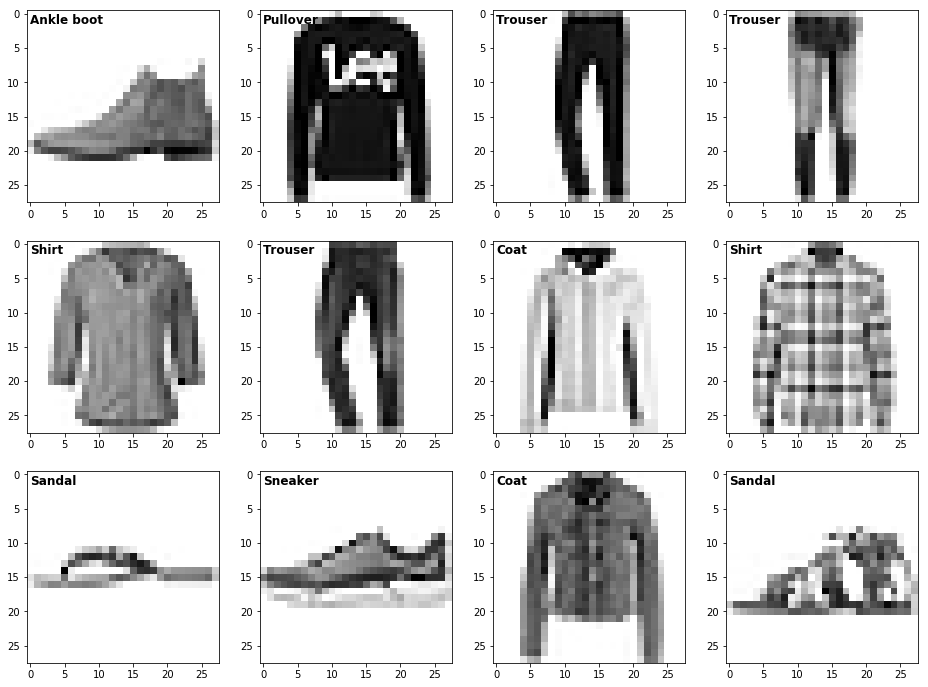

In [6]:
fig,axes=plt.subplots(3, 4, figsize=(16, 12))
for i,ax in enumerate(axes.flat):
    _=show_img(X_test.reshape([-1,28,28])[i],ax=ax)
    _=ax.text(0,0, labels[y_test[i]],
        verticalalignment='top', color='black', fontsize=12, weight='bold')

# Normalize dataset (preprocessing for Neural Net)

In [7]:
n_mean = np.mean(X_train)
n_std = np.std(X_train)
n_mean,n_std

(72.94035223214286, 90.02118235130519)

In [8]:
X_train = np.array((X_train - n_mean)/n_std)
X_test = np.array((X_test - n_mean)/n_std)

In [9]:
X_train.shape

(60000, 784)

In [10]:
np.mean(X_train)

-1.74808013869143e-17

# Applying Neural net model
- Stochastic gradient descent
- 1 hidden layer
- Softmax activation for output layer, ReLU for other layers
- L2 regularization

In [15]:
from model.activation_classes import ReLU,Sigmoid,LeakyReLU
from model.neural_network import CustomNeuralNetwork

In [16]:
act_obj = ReLU()
layers = [X_train.shape[1],100,10]
layers

[784, 100, 10]

In [17]:
nn = CustomNeuralNetwork(layers,act_obj)

## No l2 regularization (l2=0)

Epoch 1. Training loss: 2.9489168672255204, Val loss:3.481525681055469
Epoch 2. Training loss: 2.778400119310902, Val loss:3.0193271392098033
Epoch 3. Training loss: 2.735824302542128, Val loss:3.415448885775425
Epoch 4. Training loss: 2.7446793700773653, Val loss:3.703486990345996
Epoch 5. Training loss: 2.787436298456632, Val loss:3.0745350249012513


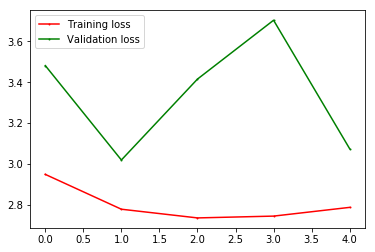

In [194]:
nn.fit_epoch(X_train,y_train,X_test,y_test,lr=0.01,epochs=5,bs=512)

Epoch 1. Training loss: 0.7880122308672165, Val loss:0.8010807662240778
Epoch 2. Training loss: 0.7798141842254848, Val loss:0.7965325472238913
Epoch 3. Training loss: 0.776284811586093, Val loss:0.7922179527083798
Epoch 4. Training loss: 0.7729580080155023, Val loss:0.7881014526576602
Epoch 5. Training loss: 0.7697823764153524, Val loss:0.7841551603336737
Epoch 6. Training loss: 0.7667299825805938, Val loss:0.7803635988999236
Epoch 7. Training loss: 0.7637853705691704, Val loss:0.7767307703624498
Epoch 8. Training loss: 0.7609325763091156, Val loss:0.7732467182668896
Epoch 9. Training loss: 0.7581627220311515, Val loss:0.7699111202394039
Epoch 10. Training loss: 0.755468867019022, Val loss:0.766712567968624
Epoch 11. Training loss: 0.752842235300128, Val loss:0.763628956743271
Epoch 12. Training loss: 0.7502778439909424, Val loss:0.7606525061851516
Epoch 13. Training loss: 0.7477681225849878, Val loss:0.7577799056290795
Epoch 14. Training loss: 0.7453111821348567, Val loss:0.755010145

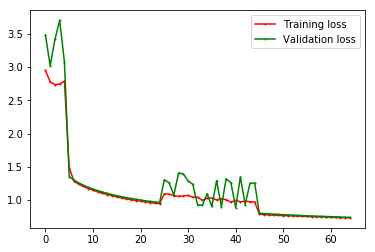

In [197]:
nn.fit_epoch(X_train,y_train,X_test,y_test,lr=0.001,epochs=20,bs=512)

Epoch 1. Training loss: 0.671948775732667, Val loss:0.6821920287204709
Epoch 2. Training loss: 0.670222472202753, Val loss:0.680555022827165
Epoch 3. Training loss: 0.6685046216756554, Val loss:0.6789231193281474
Epoch 4. Training loss: 0.6667965940664408, Val loss:0.6773057499397158
Epoch 5. Training loss: 0.6650977879905501, Val loss:0.6756997275584913
Epoch 6. Training loss: 0.6634090545244806, Val loss:0.6741022647227787
Epoch 7. Training loss: 0.6617319267915919, Val loss:0.672508543400481
Epoch 8. Training loss: 0.6600597993170945, Val loss:0.6709184436565648
Epoch 9. Training loss: 0.6583971985551863, Val loss:0.6693364404986417
Epoch 10. Training loss: 0.6567442757826135, Val loss:0.66776031876229
Epoch 11. Training loss: 0.6550973927654985, Val loss:0.6661960653047748
Epoch 12. Training loss: 0.6534659717820085, Val loss:0.6646451835606706
Epoch 13. Training loss: 0.6518448486575243, Val loss:0.6630994595183812
Epoch 14. Training loss: 0.650226757733936, Val loss:0.66155978050

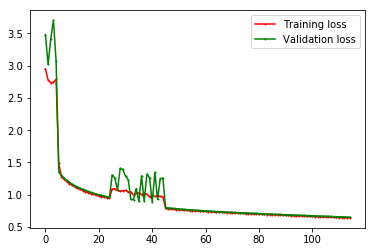

In [200]:
nn.fit_epoch(X_train,y_train,X_test,y_test,lr=0.001,epochs=20,bs=512)

Epoch 1. Training loss: 0.5840834585683052, Val loss:0.5996791604340527
Epoch 2. Training loss: 0.5829041350006327, Val loss:0.5985955844055418
Epoch 3. Training loss: 0.5817368549079711, Val loss:0.5975182426776058
Epoch 4. Training loss: 0.5805794069388899, Val loss:0.5964592592108888
Epoch 5. Training loss: 0.5794301996901221, Val loss:0.5954154581012112
Epoch 6. Training loss: 0.5782881898569256, Val loss:0.594379453863885
Epoch 7. Training loss: 0.5771518177487552, Val loss:0.5933465720960486
Epoch 8. Training loss: 0.576021185616646, Val loss:0.592324951425162
Epoch 9. Training loss: 0.5749019287260722, Val loss:0.5913173711598595
Epoch 10. Training loss: 0.5737994013607881, Val loss:0.5903231536295874


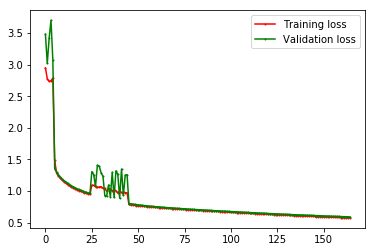

In [205]:
nn.fit_epoch(X_train,y_train,X_test,y_test,lr=0.001,epochs=10,bs=512)

## With l2 regularization

In [21]:
nn = CustomNeuralNetwork(layers,act_obj)

Epoch 1. Training loss: 2.9780203114666928, Val loss:2.787931258955658
Epoch 2. Training loss: 2.687431236972925, Val loss:2.8540038369716987


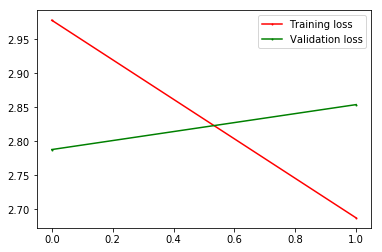

In [214]:
nn.fit_epoch(X_train,y_train,X_test,y_test,lr=0.01,epochs=2,bs=512,l2=2)

Epoch 1. Training loss: 1.7747704404651792, Val loss:1.836060272685847
Epoch 2. Training loss: 1.667613435893138, Val loss:1.884380271066589
Epoch 3. Training loss: 1.612076698260816, Val loss:1.7920380866186585
Epoch 4. Training loss: 1.5961640973762112, Val loss:1.931678455370265
Epoch 5. Training loss: 1.574466585373759, Val loss:1.7038271778922347
Epoch 6. Training loss: 1.5556471268225416, Val loss:1.328181938291138
Epoch 7. Training loss: 1.433716952333287, Val loss:1.3034551973676902
Epoch 8. Training loss: 1.4443769449718962, Val loss:1.3102604561951254
Epoch 9. Training loss: 1.3563897439075219, Val loss:1.2614734569785104
Epoch 10. Training loss: 1.3044335283632955, Val loss:1.3115313554797934


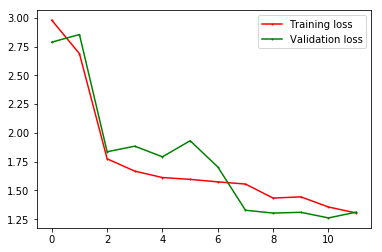

In [215]:
nn.fit_epoch(X_train,y_train,X_test,y_test,lr=0.005,epochs=10,bs=512,l2=2)

Train for a little more

Epoch 1. Training loss: 0.45845793130522283, Val loss:0.48903680498663143
Epoch 2. Training loss: 0.4582247759260012, Val loss:0.48883061577756726
Epoch 3. Training loss: 0.45799266225662205, Val loss:0.4886254777271667
Epoch 4. Training loss: 0.4577615435269322, Val loss:0.4884215619011196
Epoch 5. Training loss: 0.45753134946501545, Val loss:0.4882187336015906
Epoch 6. Training loss: 0.45730222322961717, Val loss:0.48801723002392683
Epoch 7. Training loss: 0.45707420259415327, Val loss:0.487816088738688
Epoch 8. Training loss: 0.4568468616198956, Val loss:0.48761576082783775
Epoch 9. Training loss: 0.45662038879993294, Val loss:0.48741632573261
Epoch 10. Training loss: 0.45639492714322266, Val loss:0.48721803403568553
Epoch 11. Training loss: 0.45617048177104697, Val loss:0.4870208311850455
Epoch 12. Training loss: 0.455946990032156, Val loss:0.48682431984236274
Epoch 13. Training loss: 0.4557246203788284, Val loss:0.48662917171409625
Epoch 14. Training loss: 0.45550307200943546, Val

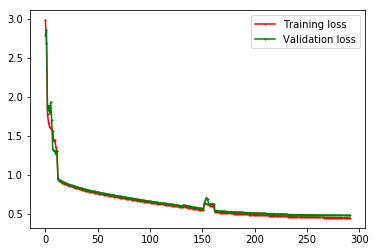

In [231]:
nn.fit_epoch(X_train,y_train,X_test,y_test,lr=0.001,epochs=40,bs=512,l2=1)

# Evaluate neural net

In [232]:
from model.metrics import accuracy

In [233]:
#accuracy on test set
y_pred=nn.predict(X_test)
accuracy(y_test,y_pred)

0.8251

In [234]:
# Compute confusion matrix for a model
from sklearn.metrics import confusion_matrix
import seaborn as sns
cm = confusion_matrix(y_test, y_pred)

Text(0.5,69,'Predicted label')

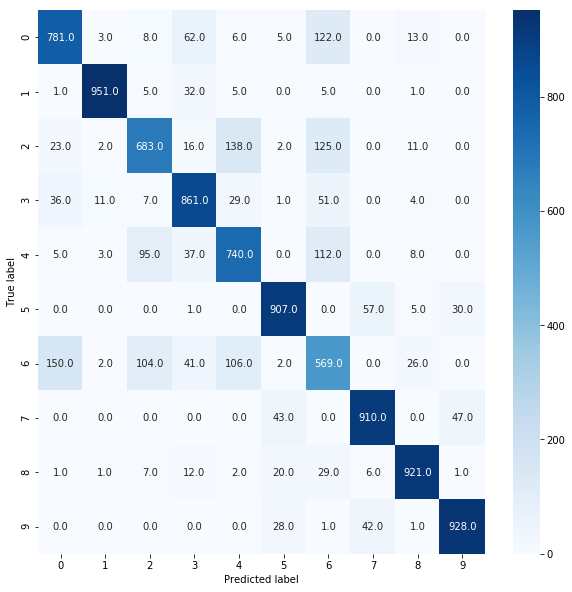

In [235]:
# view with a heatmap
from matplotlib import pyplot as plt
plt.figure(figsize=(10,10))
sns.heatmap(cm, annot=True, cmap='Blues',fmt='.1f')
plt.ylabel('True label')
plt.xlabel('Predicted label')


This model does well on this dataset without regularization (As seen in 'Without L2' part, train loss and val loss are not much different from each other). However, adding L2 reg seems to make it faster to reach a better log loss score on validation set. Combining with manual fine tuning on learning rate and l2 rate, this model achieves 82% accuracy on test set after ~200 epochs. This is really good comparing to the NN pytorch module I created [here](https://github.com/anhquan0412/basic_model_scratch/blob/master/NN_pytorch.ipynb) which achieves 87% acccuracy using batch normalization, dropout and Adam optimizer. 


# With different activation

In [40]:
from model.activation_classes import ReLU,Sigmoid,LeakyReLU,Tanh
from model.neural_network import CustomNeuralNetwork

layers = [X_train.shape[1],100,10]
layers

[784, 100, 10]

## Sigmoid

In [41]:
act_obj = Sigmoid()
nn = CustomNeuralNetwork(layers,act_obj)

Epoch 1. Training loss: 2.2079680434308773, Val loss:2.1542332233236334
Epoch 2. Training loss: 2.136438751278435, Val loss:2.1199562299236616
Epoch 3. Training loss: 2.102989678225053, Val loss:2.0865102576735355
Epoch 4. Training loss: 2.067417374462422, Val loss:2.049318092884598
Epoch 5. Training loss: 2.02722166222086, Val loss:2.0073608695305056


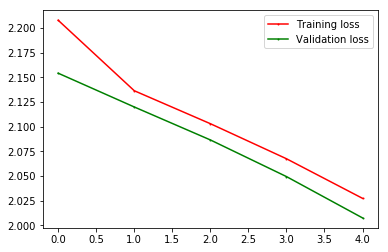

In [42]:
nn.fit_epoch(X_train,y_train,X_test,y_test,lr=0.01,epochs=5,bs=512,l2=0)

Epoch 1. Training loss: 2.0028613661818855, Val loss:2.002826165980895
Epoch 2. Training loss: 1.9982448979836585, Val loss:1.9983342587150568
Epoch 3. Training loss: 1.993650689575512, Val loss:1.9938274010960289
Epoch 4. Training loss: 1.9890410949368025, Val loss:1.9892937296396656
Epoch 5. Training loss: 1.9844071231981684, Val loss:1.9847325373520173
Epoch 6. Training loss: 1.9797477771239602, Val loss:1.9801458393787252
Epoch 7. Training loss: 1.9750645245132932, Val loss:1.9755363176938707
Epoch 8. Training loss: 1.970359701001586, Val loss:1.9709068220626498
Epoch 9. Training loss: 1.9656359946639135, Val loss:1.966260247809907
Epoch 10. Training loss: 1.960896252893635, Val loss:1.9615995012468141
Epoch 11. Training loss: 1.9561433954909337, Val loss:1.9569274830802628
Epoch 12. Training loss: 1.9513803670066445, Val loss:1.952247074154325
Epoch 13. Training loss: 1.9466101054053593, Val loss:1.9475611208161046
Epoch 14. Training loss: 1.9418355183690432, Val loss:1.9428724200

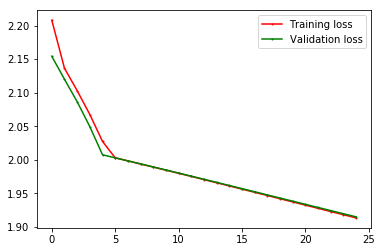

In [43]:
nn.fit_epoch(X_train,y_train,X_test,y_test,lr=0.001,epochs=20,bs=512,l2=0)

With sigmoid, model is slower to learn. This can be the result of vanishing gradient problem as sigmoid's gradient is easier to approach 0 when inputs are at two extreme ends.

## Leaky ReLU activation?

In [48]:
act_obj = LeakyReLU()
nn = CustomNeuralNetwork(layers,act_obj)

Epoch 1. Training loss: 2.9122617252387832, Val loss:2.831944970324196
Epoch 2. Training loss: 2.39801878740374, Val loss:2.261103771704497
Epoch 3. Training loss: 2.427667933233322, Val loss:3.199589164086086
Epoch 4. Training loss: 2.418664644373875, Val loss:3.1486781831217554
Epoch 5. Training loss: 2.566634661636582, Val loss:3.2339314052081995


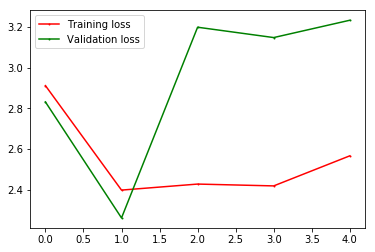

In [49]:
nn.fit_epoch(X_train,y_train,X_test,y_test,lr=0.01,epochs=5,bs=512,l2=2)

Epoch 1. Training loss: 1.1922118778769708, Val loss:1.0710697969234335
Epoch 2. Training loss: 1.0152710496560458, Val loss:1.0315467524165625
Epoch 3. Training loss: 0.982055741146897, Val loss:1.0002570899971945
Epoch 4. Training loss: 0.9548985983357865, Val loss:0.974088137307884
Epoch 5. Training loss: 0.9318153385470903, Val loss:0.9518156642414984
Epoch 6. Training loss: 0.9119289028124565, Val loss:0.9326258338162162
Epoch 7. Training loss: 0.8945819930559855, Val loss:0.9159402323742661
Epoch 8. Training loss: 0.8793413274770004, Val loss:0.9011630572165997
Epoch 9. Training loss: 0.8658618753737547, Val loss:0.8879850779769073
Epoch 10. Training loss: 0.85387855418238, Val loss:0.8761594697708788
Epoch 11. Training loss: 0.8431611052044371, Val loss:0.8654991128581427
Epoch 12. Training loss: 0.8335208679832041, Val loss:0.8558289644247449
Epoch 13. Training loss: 0.8248167864713973, Val loss:0.8470134766011921
Epoch 14. Training loss: 0.8169328641088323, Val loss:0.83893626

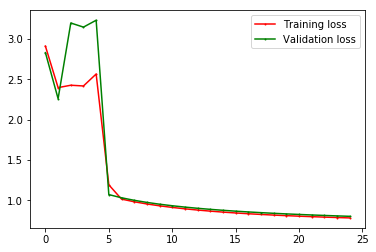

In [50]:
nn.fit_epoch(X_train,y_train,X_test,y_test,lr=0.001,epochs=20,bs=512,l2=2)

## Tanh activation

In [51]:
act_obj = Tanh()
nn = CustomNeuralNetwork(layers,act_obj)

Epoch 1. Training loss: 2.0999233784694957, Val loss:2.0358802555227933
Epoch 2. Training loss: 2.0020841962999687, Val loss:1.969175427216433
Epoch 3. Training loss: 1.9316250087626763, Val loss:1.898417676366854
Epoch 4. Training loss: 1.857334229971547, Val loss:1.8245502295970901
Epoch 5. Training loss: 1.7818421924295407, Val loss:1.7505339650271199


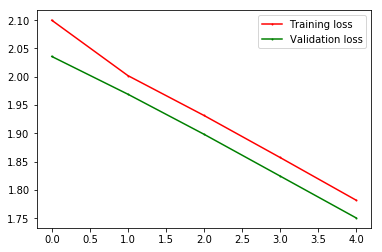

In [52]:
nn.fit_epoch(X_train,y_train,X_test,y_test,lr=0.01,epochs=5,bs=512,l2=0)

Epoch 1. Training loss: 1.740086431965258, Val loss:1.7429609684339855
Epoch 2. Training loss: 1.7326342610372123, Val loss:1.7356635146882082
Epoch 3. Training loss: 1.7253326920445162, Val loss:1.7284157774744158
Epoch 4. Training loss: 1.7180789642484642, Val loss:1.721190032331579
Epoch 5. Training loss: 1.7108600486580852, Val loss:1.7139840283403145
Epoch 6. Training loss: 1.7036757552302233, Val loss:1.7067989558482288
Epoch 7. Training loss: 1.6965273012618192, Val loss:1.6996363578949298
Epoch 8. Training loss: 1.6894152416718098, Val loss:1.69249763664261
Epoch 9. Training loss: 1.6823392111961102, Val loss:1.6853839126343784
Epoch 10. Training loss: 1.6752981032732133, Val loss:1.6782959461584364
Epoch 11. Training loss: 1.6682903140722956, Val loss:1.671234096160351
Epoch 12. Training loss: 1.6613139370870555, Val loss:1.6641983049148605
Epoch 13. Training loss: 1.6543668829928262, Val loss:1.657188092115878
Epoch 14. Training loss: 1.647446933322894, Val loss:1.65020254805

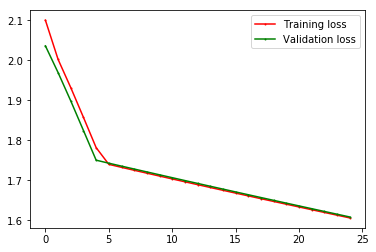

In [53]:
nn.fit_epoch(X_train,y_train,X_test,y_test,lr=0.001,epochs=20,bs=512,l2=2)

# Dropout

In [65]:
layers = [X_train.shape[1],100,10]
layers

act_obj = ReLU()
nn = CustomNeuralNetwork(layers,act_obj,0.9)

Epoch 1. Training loss: 2.713198038507928, Val loss:2.742190507090039
Epoch 2. Training loss: 2.5720206370237206, Val loss:2.992309190585378
Epoch 3. Training loss: 2.499240076003374, Val loss:3.2752241617101348
Epoch 4. Training loss: 2.5238658626905726, Val loss:3.1381103575641176
Epoch 5. Training loss: 2.5950786943316455, Val loss:2.6091254751795403


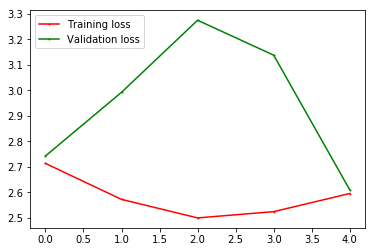

In [66]:
nn.fit_epoch(X_train,y_train,X_test,y_test,lr=0.01,epochs=5,bs=512,l2=0)

Epoch 1. Training loss: 1.5422357992135782, Val loss:1.2262214199776347
Epoch 2. Training loss: 1.4425761839021538, Val loss:1.211987959299386
Epoch 3. Training loss: 1.4113910834968826, Val loss:1.1843718839654247
Epoch 4. Training loss: 1.3800859923050957, Val loss:1.17023321615352
Epoch 5. Training loss: 1.348536163391982, Val loss:1.154302358660241
Epoch 6. Training loss: 1.3257981498373488, Val loss:1.1448024778646562
Epoch 7. Training loss: 1.3059159296107399, Val loss:1.1411007083532374
Epoch 8. Training loss: 1.29375053570279, Val loss:1.1454362250757624
Epoch 9. Training loss: 1.2765070217017855, Val loss:1.1192174204336436
Epoch 10. Training loss: 1.2618817318117734, Val loss:1.1370280423577661
Epoch 11. Training loss: 1.2476646347116338, Val loss:1.1152597037947625
Epoch 12. Training loss: 1.2343608794422614, Val loss:1.1002364730167484
Epoch 13. Training loss: 1.2217372208420059, Val loss:1.1023789544111477
Epoch 14. Training loss: 1.2094117391430712, Val loss:1.09868565271

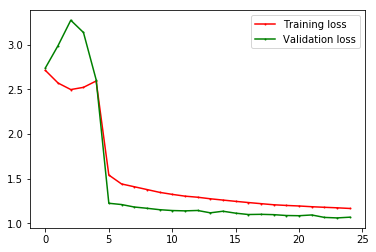

In [67]:
nn.fit_epoch(X_train,y_train,X_test,y_test,lr=0.001,epochs=20,bs=512,l2=0)

We can clearly see the effect of applying dropout in this datset. As mentioned before, this dataset does not need much regularization, so adding dropout will make the model underfit the dataset (val loss < train loss)

# Deeper Neural Net

## Tanh + ReLU activations

In [70]:
act_obj = [Tanh(),ReLU()]
layers = [X_train.shape[1],30,20,10]
print(layers)

nn = CustomNeuralNetwork(layers,act_obj)

[784, 30, 20, 10]


Epoch 1. Training loss: 2.3071885011567437, Val loss:2.2182550769990574
Epoch 2. Training loss: 2.1963788406616347, Val loss:2.184160420521485
Epoch 3. Training loss: 2.178603675558939, Val loss:2.175395567355616
Epoch 4. Training loss: 2.1722257018138156, Val loss:2.1708405503629455
Epoch 5. Training loss: 2.168448719755932, Val loss:2.167732812457978
Epoch 6. Training loss: 2.1657067804715657, Val loss:2.1652994627480586
Epoch 7. Training loss: 2.163477610713266, Val loss:2.1632247586625493
Epoch 8. Training loss: 2.1615326705450637, Val loss:2.1613620453513582
Epoch 9. Training loss: 2.1597613844937205, Val loss:2.1596344678994868
Epoch 10. Training loss: 2.158102616676927, Val loss:2.157998979301651


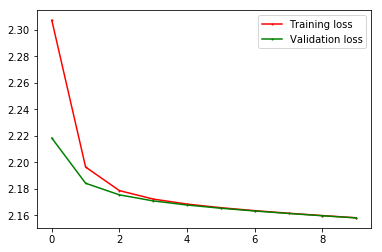

In [71]:
nn.fit_epoch(X_train,y_train,X_test,y_test,lr=0.001,epochs=10,bs=512,l2=2)

Epoch 1. Training loss: 2.1267937834429445, Val loss:2.1268889098820756
Epoch 2. Training loss: 2.125168684094227, Val loss:2.1252871769785995
Epoch 3. Training loss: 2.123515690811059, Val loss:2.123661555195597
Epoch 4. Training loss: 2.12183312047521, Val loss:2.122008011795041
Epoch 5. Training loss: 2.1201197937817176, Val loss:2.120325953064154
Epoch 6. Training loss: 2.1183749531507132, Val loss:2.1186121272143
Epoch 7. Training loss: 2.116595309953475, Val loss:2.1168622772306884
Epoch 8. Training loss: 2.1147795808333085, Val loss:2.1150780844889594
Epoch 9. Training loss: 2.1129260502174287, Val loss:2.113258131946145
Epoch 10. Training loss: 2.111032941453285, Val loss:2.1113977649170295
Epoch 11. Training loss: 2.109097723518066, Val loss:2.10949533949218
Epoch 12. Training loss: 2.107117304878256, Val loss:2.1075513396674306
Epoch 13. Training loss: 2.1050872725448184, Val loss:2.105561099919378
Epoch 14. Training loss: 2.103006603179179, Val loss:2.103520480021727
Epoch 1

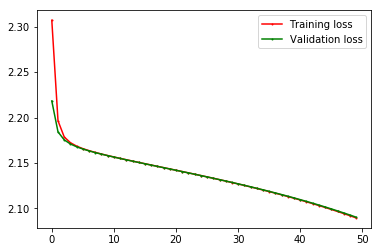

In [73]:
nn.fit_epoch(X_train,y_train,X_test,y_test,lr=0.001,epochs=20,bs=512,l2=0)

## Only ReLu

In [ ]:
act_obj = ReLU()
layers = [X_train.shape[1],30,20,10]
print(layers)

nn = CustomNeuralNetwork(layers,act_obj)

Epoch 1. Training loss: 2.251399851493328, Val loss:2.2340087568512934
Epoch 2. Training loss: 2.147548126351278, Val loss:2.217590118543584
Epoch 3. Training loss: 2.1328230945941193, Val loss:2.2018447789128412
Epoch 4. Training loss: 2.1183249943472937, Val loss:2.185816867972672
Epoch 5. Training loss: 2.103438577729974, Val loss:2.1690841611273863
Epoch 6. Training loss: 2.087790116079619, Val loss:2.1513077780497913
Epoch 7. Training loss: 2.0710489602567694, Val loss:2.1321530181733657
Epoch 8. Training loss: 2.052927246074189, Val loss:2.111372617260571
Epoch 9. Training loss: 2.033193428937091, Val loss:2.0886849694791527
Epoch 10. Training loss: 2.011641957737308, Val loss:2.06390554195209


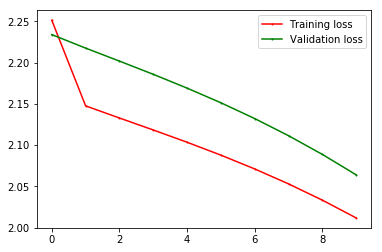

In [57]:
nn.fit_epoch(X_train,y_train,X_test,y_test,lr=0.001,epochs=10,bs=512,l2=2)

Epoch 1. Training loss: 1.3097806084877954, Val loss:1.3291423040506751
Epoch 2. Training loss: 1.3023353101308597, Val loss:1.388434451500173
Epoch 3. Training loss: 1.2952853606324042, Val loss:1.3787619869211034
Epoch 4. Training loss: 1.284319419502578, Val loss:1.3119930882260993
Epoch 5. Training loss: 1.2760227007072154, Val loss:1.308110890061248
Epoch 6. Training loss: 1.2713430875181182, Val loss:1.2972796858589568
Epoch 7. Training loss: 1.258513988011788, Val loss:1.286891446536391
Epoch 8. Training loss: 1.261942550865047, Val loss:1.3149182906880768
Epoch 9. Training loss: 1.2528386308585762, Val loss:1.2792056243931689
Epoch 10. Training loss: 1.2550406141664268, Val loss:1.3111686767129291
Epoch 11. Training loss: 1.2491439091543683, Val loss:1.280495698054411
Epoch 12. Training loss: 1.235385449546147, Val loss:1.2622582621445406
Epoch 13. Training loss: 1.2417737529380717, Val loss:1.2679078438689884
Epoch 14. Training loss: 1.2355673889524585, Val loss:1.249962179866

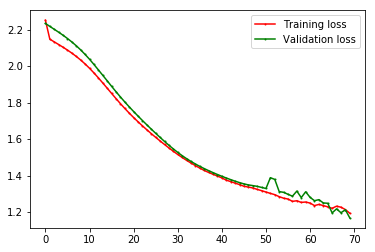

In [60]:
nn.fit_epoch(X_train,y_train,X_test,y_test,lr=0.001,epochs=20,bs=512,l2=0)

Epoch 1. Training loss: 1.0161779510497149, Val loss:1.0237698680091396
Epoch 2. Training loss: 1.0122533928611814, Val loss:1.0200964960662577
Epoch 3. Training loss: 1.008381905114873, Val loss:1.0164696964389384
Epoch 4. Training loss: 1.00456505665191, Val loss:1.0128939292211399
Epoch 5. Training loss: 1.0008000725794601, Val loss:1.0093681765669145
Epoch 6. Training loss: 0.9970813403986711, Val loss:1.005887968303579
Epoch 7. Training loss: 0.9934053062189838, Val loss:1.002452294126439
Epoch 8. Training loss: 0.9897757371602686, Val loss:0.9990629517864134
Epoch 9. Training loss: 0.9861928108765421, Val loss:0.9957177595077297
Epoch 10. Training loss: 0.9826591440269312, Val loss:0.9924207323365106
Epoch 11. Training loss: 0.9791695939594519, Val loss:0.9891657342316925
Epoch 12. Training loss: 0.975721017854, Val loss:0.9859535708865004
Epoch 13. Training loss: 0.9723160954835921, Val loss:0.9827831943200809
Epoch 14. Training loss: 0.968958719963524, Val loss:0.97964966997729

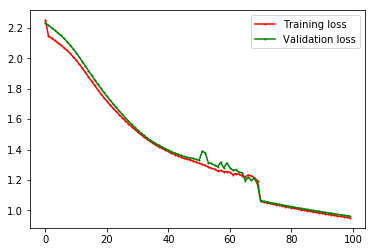

In [62]:
nn.fit_epoch(X_train,y_train,X_test,y_test,lr=0.0005,epochs=20,bs=512,l2=0)

# Deeper and bigger NN -> Error

In [81]:
act_obj = ReLU()
layers = [X_train.shape[1],100,100,10]
print(layers)

nn = CustomNeuralNetwork(layers,act_obj)

[784, 100, 100, 10]


C:\Users\qtran\basic_model_scratch\model\activation_classes.py:27: RuntimeWarning: invalid value encountered in greater_equal
  return np.where(x >= 0, x, 0)
C:\Users\qtran\basic_model_scratch\model\activation_classes.py:30: RuntimeWarning: invalid value encountered in greater_equal
  return np.where(x >= 0, 1, 0)
C:\Users\qtran\basic_model_scratch\model\neural_network.py:87: RuntimeWarning: invalid value encountered in multiply
  grad_wrt_input = grad_wrt_input * self.act_objs[i].grad(self.X_inputs[i+1]) # actual grad_wrt_input
C:\Users\qtran\basic_model_scratch\model\neural_network.py:92: RuntimeWarning: invalid value encountered in multiply
  grad_w+= (l2/bs) * self.weights[i][0] # l2 reg


Epoch 1. Training loss: 3.1526923071050046, Val loss:2.3027694560379373
Epoch 2. Training loss: 2.302759264788691, Val loss:2.3027303694485006
Epoch 3. Training loss: 2.302724240305615, Val loss:2.302699413238316


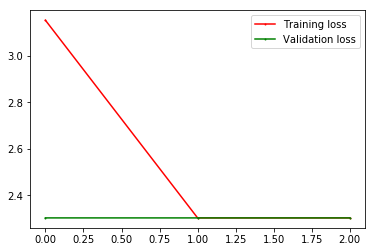

In [82]:
nn.fit_epoch(X_train,y_train,X_test,y_test,lr=0.01,epochs=3,bs=512,l2=0)

There is a problem with the code: X_input will grow really fast (exponentially?) even though weights are still between 0 and 1 (probably due to large hidden layers, i.e >1000 or **multiple hidden layers**, i.e 2 hidden layers 50->20 and matrix multiplication is essentially adding up as many numbers as the weights' shape) which makes grad_wrt_input grows fast (grad_wrt_input needs grad_relu(X_input) which will return X_input itself if it's >=0) -> grad_w grow fast -> weight update fast -> X_input grow fast ...

## Solution: dropout + pick another activation function

In [163]:
act_obj = [Tanh(),Tanh(),ReLU()]
layers = [X_train.shape[1],30,20,10,10]
print(layers)

nn = CustomNeuralNetwork(layers,act_obj,keep_prob=[0.95,0.95,1.0])

[784, 30, 20, 10, 10]


Epoch 1. Training loss: 2.1787072110197445, Val loss:2.140505718502418
Epoch 2. Training loss: 2.1237632253674352, Val loss:2.11625121703487
Epoch 3. Training loss: 2.102583141653826, Val loss:2.099485764983886
Epoch 4. Training loss: 2.0840103317458336, Val loss:2.077847421939451
Epoch 5. Training loss: 2.0550091011766756, Val loss:2.037163879953762
Epoch 6. Training loss: 1.9868209197559903, Val loss:1.926151013341991
Epoch 7. Training loss: 1.8398821271307093, Val loss:1.777489367760297
Epoch 8. Training loss: 1.7125192766779656, Val loss:1.6636987774128276
Epoch 9. Training loss: 1.5882759523467034, Val loss:1.6082961374868348
Epoch 10. Training loss: 1.455459228872044, Val loss:1.3578933184578523


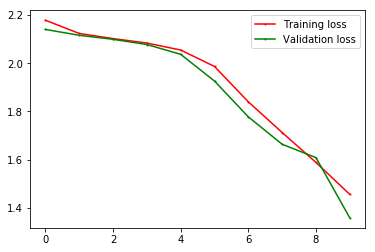

In [164]:
nn.fit_epoch(X_train,y_train,X_test,y_test,lr=0.2,epochs=10,bs=2048,l2=0)

Epoch 1. Training loss: 0.670950574959092, Val loss:0.6725275193183249
Epoch 2. Training loss: 0.6549214387354032, Val loss:0.6583567566822888
Epoch 3. Training loss: 0.6407210453687875, Val loss:0.6508838513188369
Epoch 4. Training loss: 0.6263267775376135, Val loss:0.6289787473480001
Epoch 5. Training loss: 0.6084438248969699, Val loss:0.613212018302684
Epoch 6. Training loss: 0.5935874938039444, Val loss:0.5932692868591364
Epoch 7. Training loss: 0.5806362450780322, Val loss:0.567639179000984
Epoch 8. Training loss: 0.5685674613281061, Val loss:0.553253668790334
Epoch 9. Training loss: 0.5530667591682357, Val loss:0.5422869592692101
Epoch 10. Training loss: 0.5429686656007618, Val loss:0.5401976142708454
Epoch 11. Training loss: 0.5543722975365873, Val loss:0.5319217236488909
Epoch 12. Training loss: 0.5318128585242181, Val loss:0.5260550349272987
Epoch 13. Training loss: 0.5327198000828565, Val loss:0.513140013914179
Epoch 14. Training loss: 0.5166833994607852, Val loss:0.514027042

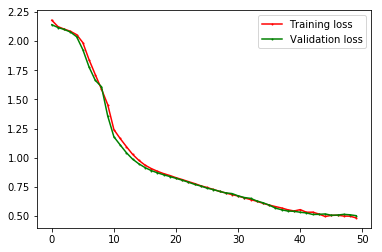

In [166]:
nn.fit_epoch(X_train,y_train,X_test,y_test,lr=0.1,epochs=20,bs=2048,l2=0)

Epoch 1. Training loss: 0.4612555173775329, Val loss:0.46717490006340323
Epoch 2. Training loss: 0.45635080081921053, Val loss:0.46675942817339044
Epoch 3. Training loss: 0.45618358182184066, Val loss:0.4664148216719441
Epoch 4. Training loss: 0.45369593042785933, Val loss:0.46627813290173054
Epoch 5. Training loss: 0.4513986774416739, Val loss:0.4657989132466642
Epoch 6. Training loss: 0.4526299021195188, Val loss:0.46541110126297497
Epoch 7. Training loss: 0.45293919749766703, Val loss:0.4651364968593553
Epoch 8. Training loss: 0.4523616408210207, Val loss:0.4648085287658394
Epoch 9. Training loss: 0.4529261684402888, Val loss:0.4645307311432278
Epoch 10. Training loss: 0.4503579738192217, Val loss:0.46408054788004155
Epoch 11. Training loss: 0.45165450545703123, Val loss:0.46361594870871775
Epoch 12. Training loss: 0.45050943084585837, Val loss:0.46373545323343396
Epoch 13. Training loss: 0.45017940638732873, Val loss:0.46319490222014503
Epoch 14. Training loss: 0.449089607322657, V

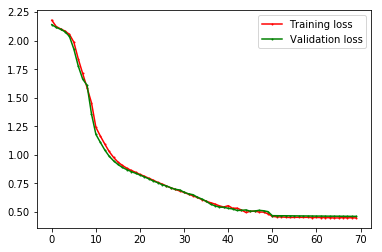

In [167]:
nn.fit_epoch(X_train,y_train,X_test,y_test,lr=0.01,epochs=20,bs=2048,l2=0)

Epoch 1. Training loss: 0.4316334212731616, Val loss:0.45109483022444674
Epoch 2. Training loss: 0.43272987410970115, Val loss:0.4510545428621421
Epoch 3. Training loss: 0.4317377158959992, Val loss:0.4510161801203776
Epoch 4. Training loss: 0.4330435293723495, Val loss:0.45100846358569063
Epoch 5. Training loss: 0.4344962819877539, Val loss:0.4510228854547843
Epoch 6. Training loss: 0.43272708522305414, Val loss:0.45096830006672245
Epoch 7. Training loss: 0.43531194358643877, Val loss:0.4509013062721107
Epoch 8. Training loss: 0.4339557817300256, Val loss:0.4508822959186935
Epoch 9. Training loss: 0.4308108341463299, Val loss:0.4508380133163675
Epoch 10. Training loss: 0.43333192573502255, Val loss:0.4508023530257684
Epoch 11. Training loss: 0.43256844927398963, Val loss:0.45077498378955916
Epoch 12. Training loss: 0.43481764213929636, Val loss:0.45077020836529663
Epoch 13. Training loss: 0.43244339102331164, Val loss:0.45072232821462366
Epoch 14. Training loss: 0.43238160254878355, V

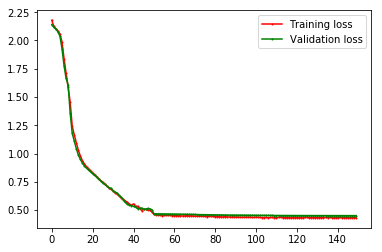

In [173]:
nn.fit_epoch(X_train,y_train,X_test,y_test,lr=0.001,epochs=20,bs=2048,l2=0)

## Evaluate neural net

In [175]:
from model.metrics import accuracy

In [176]:
#accuracy on test set
y_pred=nn.predict(X_test)
accuracy(y_test,y_pred)

0.8474

Text(0.5,69,'Predicted label')

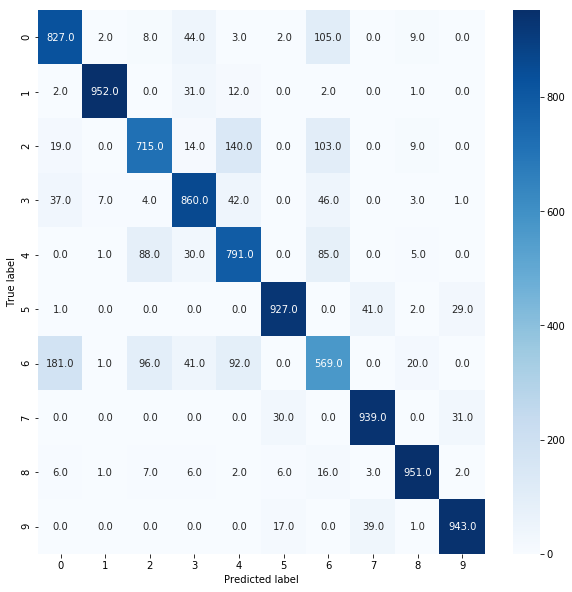

In [177]:
# Compute confusion matrix for a model
from sklearn.metrics import confusion_matrix
import seaborn as sns
cm = confusion_matrix(y_test, y_pred)

# view with a heatmap
from matplotlib import pyplot as plt
plt.figure(figsize=(10,10))
sns.heatmap(cm, annot=True, cmap='Blues',fmt='.1f')
plt.ylabel('True label')
plt.xlabel('Predicted label')